<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [625]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Μέρος 1ο

## Ερώτημα 1

In [572]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [573]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


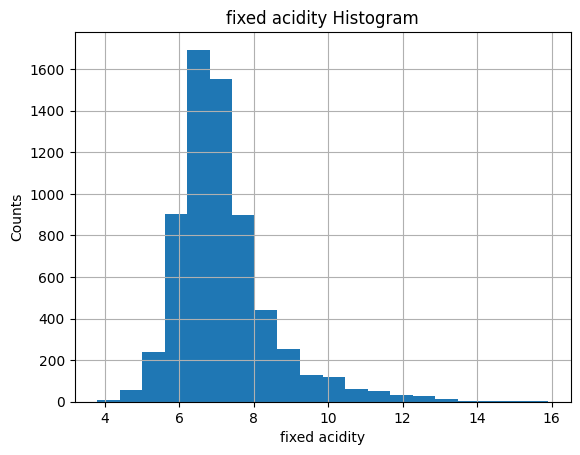

In [574]:
df['fixed acidity'].hist(bins=20)
plt.title('fixed acidity Histogram')
plt.xlabel('fixed acidity')
plt.ylabel('Counts')
plt.show()

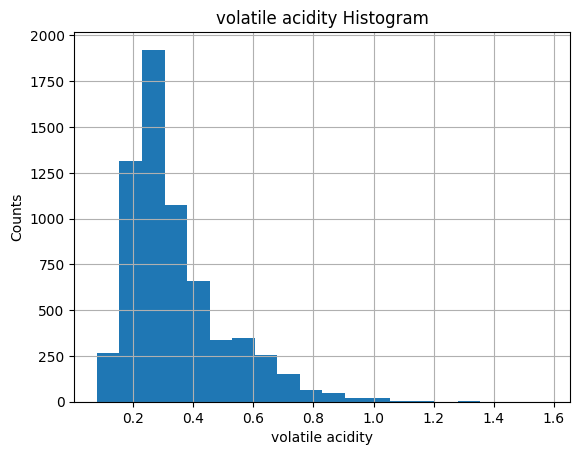

In [575]:
df['volatile acidity'].hist(bins=20)
plt.title('volatile acidity Histogram')
plt.xlabel('volatile acidity')
plt.ylabel('Counts')
plt.show()

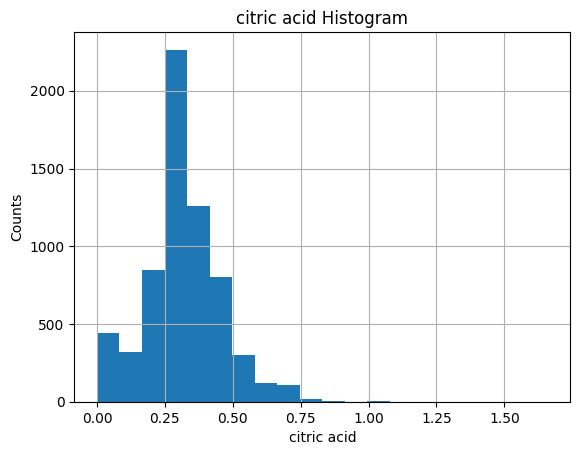

In [576]:
df['citric acid'].hist(bins=20)
plt.title('citric acid Histogram')
plt.xlabel('citric acid')
plt.ylabel('Counts')
plt.show()

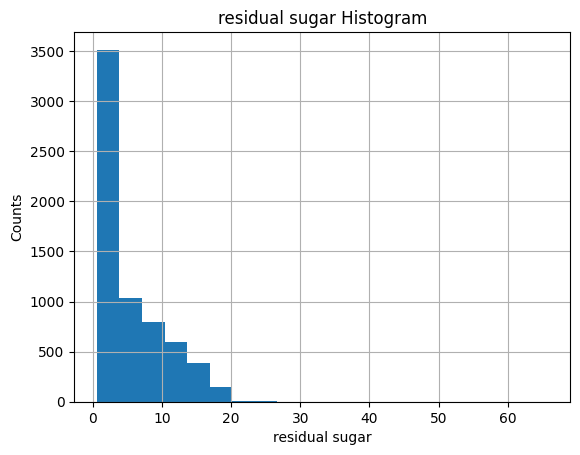

In [577]:
df['residual sugar'].hist(bins=20)
plt.title('residual sugar Histogram')
plt.xlabel('residual sugar')
plt.ylabel('Counts')
plt.show()

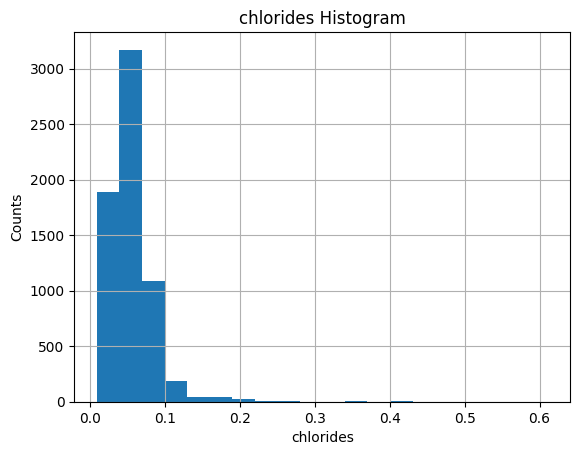

In [578]:
df['chlorides'].hist(bins=20)
plt.title('chlorides Histogram')
plt.xlabel('chlorides')
plt.ylabel('Counts')
plt.show()

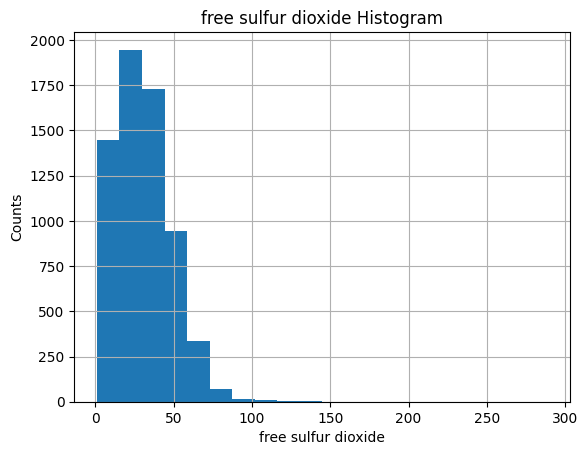

In [579]:
df['free sulfur dioxide'].hist(bins=20)
plt.title('free sulfur dioxide Histogram')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Counts')
plt.show()

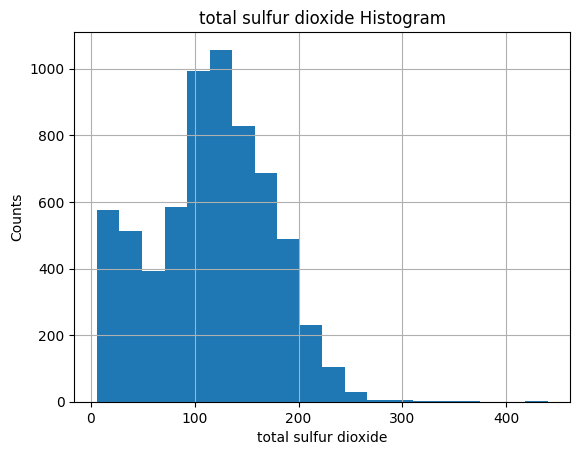

In [580]:
df['total sulfur dioxide'].hist(bins=20)
plt.title('total sulfur dioxide Histogram')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Counts')
plt.show()

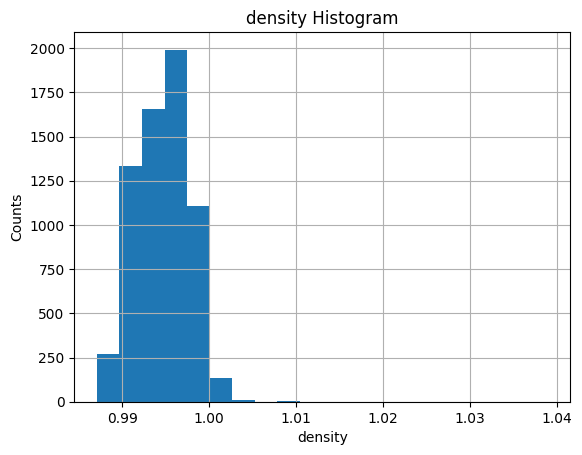

In [581]:
df['density'].hist(bins=20)
plt.title('density Histogram')
plt.xlabel('density')
plt.ylabel('Counts')
plt.show()

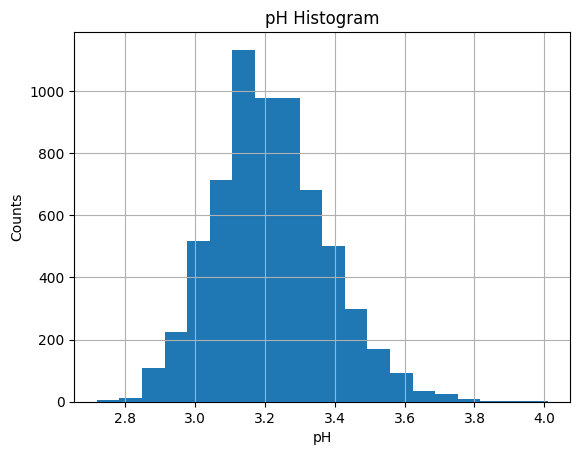

In [582]:
df['pH'].hist(bins=20)
plt.title('pH Histogram')
plt.xlabel('pH')
plt.ylabel('Counts')
plt.show()

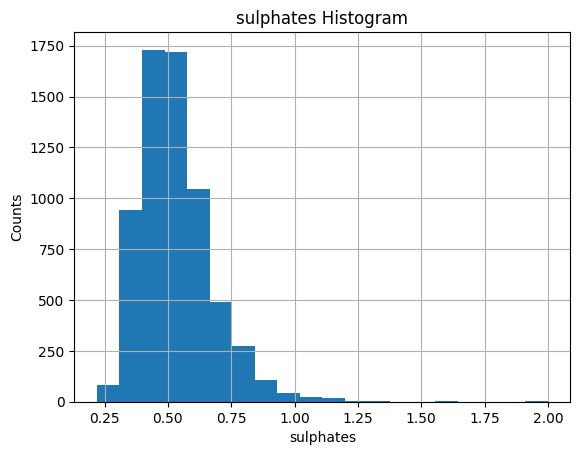

In [583]:
df['sulphates'].hist(bins=20)
plt.title('sulphates Histogram')
plt.xlabel('sulphates')
plt.ylabel('Counts')
plt.show()

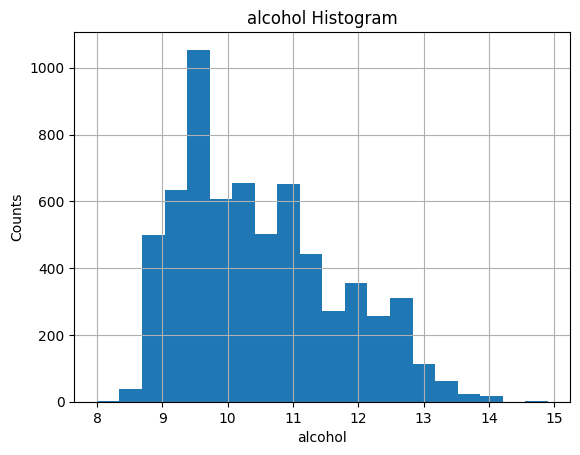

In [584]:
df['alcohol'].hist(bins=20)
plt.title('alcohol Histogram')
plt.xlabel('alcohol')
plt.ylabel('Counts')
plt.show()

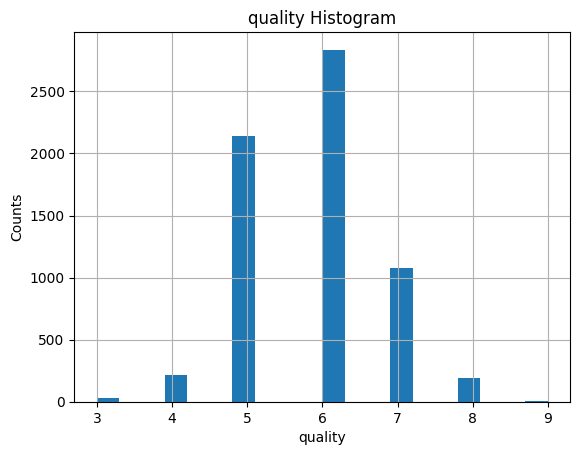

In [585]:
df['quality'].hist(bins=20)
plt.title('quality Histogram')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.show()

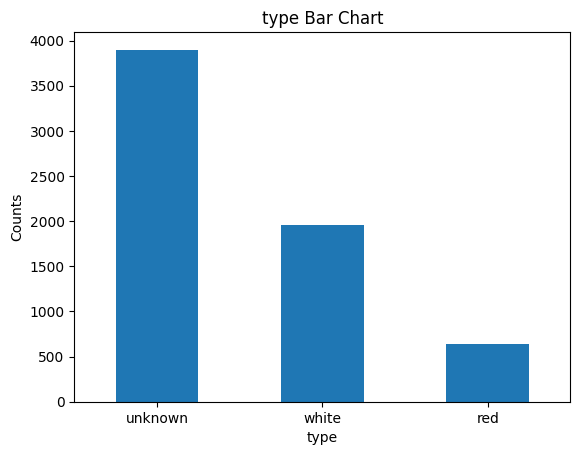

In [586]:
df['type'].value_counts().plot(kind='bar',rot=0)
plt.title('type Bar Chart')
plt.xlabel('type')
plt.ylabel('Counts')
plt.show()

Από τα διαγράμματα είναι φανερό ότι τα περισσότερα χαρακτηριστικά εμφανίζουν ακραίες τιμές και τα δεδομένα έχουν πολύ υψηλό bias. Από την άλλη, επειδή ακριβώς οφείλεται σε μεμονωμένες ακραίες τιμές, ίσως δεν επηρεάσει πολύ τα αποτελέσματα, ειδικά αν χρησιμοποιήσουμε το MAE ως μετρική στην συνέχεια.

## Ερώτημα 2

In [587]:
df['type'] = df['type'].replace('white', 0)
df['type'] = df['type'].replace('red', 1)
df['type'] = df['type'].replace('unknown', 2)
df.head()

/tmp/ipython-input-1167484991.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace('unknown', 2)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [588]:
inputs_df = df.drop(columns=['type'])
targets_df = df['type']

x = inputs_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

## Ερώτημα 3

In [589]:
x_known = x[df['type']!=2]
y_known = y[df['type']!=2]
x_unknown = x[df['type']==2]

## Ερώτημα 4

In [590]:
seed = 42
test_size = 0.3

x_known_train, x_known_test, y_known_train, y_known_test = train_test_split(x_known, y_known, test_size=test_size, random_state=seed,stratify=y_known)
x_known_train.shape, y_known_train.shape, x_known_test.shape, y_known_test.shape

((1819, 12), (1819,), (780, 12), (780,))

## Ερώτημα 5

In [591]:
forest = RandomForestClassifier(random_state=seed)
forest.fit(x_known_train, y_known_train)

RandomForestClassifier(random_state=42)

In [592]:
y_known_pred_test = forest.predict(x_known_test)
y_known_pred_train = forest.predict(x_known_train)

accuracy_test = accuracy_score(y_known_test, y_known_pred_test)
accuracy_percentage_test = round(accuracy_test*100, 2)

accuracy_train = accuracy_score(y_known_train, y_known_pred_train)
accuracy_percentage_train = round(accuracy_train*100, 2)

precision_test = precision_score(y_known_test, y_known_pred_test)
precision_percentage_test = round(precision_test*100, 2)

precision_train = precision_score(y_known_train, y_known_pred_train)
precision_percentage_train = round(precision_train*100, 2)

recall_test = recall_score(y_known_test, y_known_pred_test)
recall_percentage_test = round(recall_test*100, 2)

recall_train = recall_score(y_known_train, y_known_pred_train)
recall_percentage_train = round(recall_train*100, 2)

f1_test = f1_score(y_known_test, y_known_pred_test)
f1_percentage_test = round(f1_test*100, 2)

f1_train = f1_score(y_known_train, y_known_pred_train)
f1_percentage_train = round(f1_train*100, 2)

print("Test Set")
print(f"Accuracy :  {accuracy_percentage_test:}%")
print(f"Precision:  {precision_percentage_test:}%")
print(f"Recall   :  {recall_percentage_test:}%")
print(f"F1 Score :  {f1_percentage_test:}%")

print("\nTrain Set")
print(f"Accuracy :  {accuracy_percentage_train:}%")
print(f"Precision:  {precision_percentage_train:}%")
print(f"Recall   :  {recall_percentage_train:}%")
print(f"F1 Score :  {f1_percentage_train:}%")

Test Set
Accuracy :  99.87%
Precision:  99.48%
Recall   :  100.0%
F1 Score :  99.74%

Train Set
Accuracy :  99.95%
Precision:  99.78%
Recall   :  100.0%
F1 Score :  99.89%


Από τις μετρικές φαίνεται ότι το μοντέλο κάνει σχεδόν τέλεια ταξινόμηση των δεδομένων. Αυτό πιθανώς να συμβαίνει γιατί τα δεδομένα είναι εύκολα διαχωρίσιμα. Από το ραβδόγραμμα του ερωτήματος 1 είναι εμφανές ότι τα λευκά δείγματ είναι αρκετά περισσότερα από τα κόκκινα. Επομένως, οι κλάσεις δεν είναι ισορροπημένες και έτσι η F1 είναι πιο κατάλληλη μετρική, αφού το accuracy θα ήταν υψηλό ακόμα και αν το μοντέλο ταξινομούσε όλα τα δεδομένα ως λευκά, χωρίς να μαθαίνει.

## Ερώτημα 6

In [593]:
forest_balanced = RandomForestClassifier(random_state=seed, class_weight = 'balanced')
forest_balanced.fit(x_known_train, y_known_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [594]:
y_known_pred_test = forest_balanced.predict(x_known_test)
y_known_pred_train = forest_balanced.predict(x_known_train)

accuracy_test = accuracy_score(y_known_test, y_known_pred_test)
accuracy_percentage_test = round(accuracy_test*100, 2)

accuracy_train = accuracy_score(y_known_train, y_known_pred_train)
accuracy_percentage_train = round(accuracy_train*100, 2)

precision_test = precision_score(y_known_test, y_known_pred_test)
precision_percentage_test = round(precision_test*100, 2)

precision_train = precision_score(y_known_train, y_known_pred_train)
precision_percentage_train = round(precision_train*100, 2)

recall_test = recall_score(y_known_test, y_known_pred_test)
recall_percentage_test = round(recall_test*100, 2)

recall_train = recall_score(y_known_train, y_known_pred_train)
recall_percentage_train = round(recall_train*100, 2)

f1_test = f1_score(y_known_test, y_known_pred_test)
f1_percentage_test = round(f1_test*100, 2)

f1_train = f1_score(y_known_train, y_known_pred_train)
f1_percentage_train = round(f1_train*100, 2)

print("Test Set")
print(f"Accuracy :  {accuracy_percentage_test:}%")
print(f"Precision:  {precision_percentage_test:}%")
print(f"Recall   :  {recall_percentage_test:}%")
print(f"F1 Score :  {f1_percentage_test:}%")

print("\nTrain Set")
print(f"Accuracy :  {accuracy_percentage_train:}%")
print(f"Precision:  {precision_percentage_train:}%")
print(f"Recall   :  {recall_percentage_train:}%")
print(f"F1 Score :  {f1_percentage_train:}%")

Test Set
Accuracy :  99.49%
Precision:  99.47%
Recall   :  98.44%
F1 Score :  98.95%

Train Set
Accuracy :  99.95%
Precision:  99.78%
Recall   :  100.0%
F1 Score :  99.89%


Η παράμετρος class_weight='balanced' ουσιαστικά εφαρμόζει βάρη στην κάθε κλάση αντιστόφως ανάλογα με την συχνότητα που αυτές εμφανίζονται στα δεδομένα. Θεωρητικά η παράμτρος αυτή θα έπρεπε να βελτιώνει την απόδοση. Επειδή όμως το μοντέλο προβλέπει ήδη με πολύ καλή ακρίβεια, ίσως η επιβολή της συνθήκης αυτής το αναγκάζει να αλλάξει κάποιες από τις σωστές προβλέψεις και έτσι καταλήγει να έχει ελαφρώς χειρότερη απόδοση.

## Ερώτημα 7

In [595]:
y_unknown_proba=forest_balanced.predict_proba(x_unknown)
y_unknown_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]])

## Ερώτημα 8

 Δημιουργούμε τα targets των x_unknown με βάση τις πιθανότητες, αφού πρώτα αρχικοποιήσουμε τον πίνακα των y_unknown_pred.

In [596]:
y_unknown_pred = np.array(['unknown'] * len(x_unknown))
y_unknown_pred[y_unknown_proba[:,1] > 0.65] = 'red'
y_unknown_pred[y_unknown_proba[:,1] < 0.35] = 'white'
y_unknown_pred

array(['white', 'white', 'white', ..., 'red', 'red', 'red'], dtype='<U7')

## Ερώτημα 9

Ενώνουμε τα numpy arrays με την εντολή concatenate. Το μοντέλο δεν τρέχει όταν υπάρχουν οι τιμές 'unknown', οπότε έπρεπε να αφαιρεθούν. Εφόσον είναι πολύ λίγες οι τιμές αυτές σε σχέση με το σύνολο των δεδομένων, αυτό δεν επιφέρει πρακτικά κάποια αλλοίωση των δεδομένων.

In [597]:
unknown_count = np.sum(y_unknown_pred == 'unknown')
print("Number of unknown values:", unknown_count)

xtrain = np.concatenate((x_known_train, x_unknown[y_unknown_pred!='unknown']), axis=0)
ytrain = np.concatenate((y_known_train, y_unknown_pred[y_unknown_pred!='unknown']), axis=0)

ytrain[ytrain == 'red'] = 1
ytrain[ytrain == 'white'] = 0
ytrain = ytrain.astype(int)
ytrain

Number of unknown values: 51


array([1, 0, 0, ..., 1, 1, 1])

In [598]:
forest_new = RandomForestClassifier(random_state=42, class_weight='balanced')
forest_new.fit(xtrain, ytrain)

y_pred_test = forest_new.predict(x_known_test)
y_pred_train = forest_new.predict(xtrain)

f1_test_new = f1_score(y_known_test, y_pred_test)
f1_percentage_test_new = round(f1_test_new*100, 2)

f1_train_new = f1_score(ytrain, y_pred_train)
f1_percentage_train_new = round(f1_train_new*100, 2)

print("Test Set")
print(f"F1 Score :  {f1_percentage_test_new:}%")

print("\nTrain Set")
print(f"F1 Score :  {f1_percentage_train_new:}%")

Test Set
F1 Score :  98.95%

Train Set
F1 Score :  99.96%


## Ερώτημα 10

Εισάγουμε όλη την παραπάνω διαδικασία σε ένα while loop μέχρι να μην υπάρχουν unknowns εντός του συγκεκριμένου διαστήματος εμπιστοσύνης. Αρχικοποιούμε πρώτα τους πίνακες με τις τιμές των αρχικών πινάκων. Έπειτα εκπαιδεύουμε το Random Forest, υπολογίζουμε την πιθανότητα για τα y_unknown_pred, ενώνουμε τα σύνολα των training set και επιβάλλουμε τα labels για τα red και white με βάση τις πιθανότητες. Στην συνέχεια αφαιρούμε τα unknown labels και επαναλαμβάνουμε. Όταν τα unknown values που ικανοποιούν την συνθήκη τελειώσουν, τότε σπάμε το loop.

In [599]:
x_unknown_remaining = x_unknown.copy()


x_train_new = x_known_train.copy()
y_train_new = y_known_train.copy()

while len(x_unknown_remaining) > 0:

    forest_loop = RandomForestClassifier(random_state=seed, class_weight='balanced')
    forest_loop.fit(x_train_new, y_train_new)

    y_proba = forest_loop.predict_proba(x_unknown_remaining)[:,1]

    y_pred_new = np.array(['unknown'] * len(x_unknown_remaining))
    y_pred_new[y_proba > 0.65] = 'red'
    y_pred_new[y_proba < 0.35] = 'white'

    mask = y_pred_new != 'unknown'
    if mask.sum() == 0:
        print("There are no more high-confidence unknowns")
        break

    x_train_new = np.concatenate((x_train_new, x_unknown_remaining[mask]), axis=0)

    y_new = y_pred_new[mask]
    y_new[y_new == 'red'] = 1
    y_new[y_new == 'white'] = 0
    y_new = y_new.astype(int)

    y_train_new = np.concatenate((y_train_new, y_new))

    x_unknown_remaining = x_unknown_remaining[~mask]

    y_test_pred = forest_loop.predict(x_known_test)
    f1_test = f1_score(y_known_test, y_test_pred)
    f1_test_percentage = round(f1_test*100, 2)
    print(f"F1 Test Score :  {f1_test_percentage:}%")

F1 Test Score :  98.95%
F1 Test Score :  98.95%
F1 Test Score :  99.21%
F1 Test Score :  99.21%
F1 Test Score :  99.48%
There are no more high-confidence unknowns


Είναι εμφανές από τα παραπάνω ότι το F1 score αυξάνεται όσο μειώνουμε τα unknowns. Αυτό είναι αναμενόμενο, αφού αυξάνεται το πλήθος των τιμών στο training set. Αν μειώναμε τα thresholds στις πιθανότητες, ίσως να είχαμε ακόμα καλύτερες επιδόσεις για αυτόν ακριβώς τον λόγο.

# Μέρος 2ο

## Ερώτημα 1

In [600]:
df_full = pd.read_csv('wine-full.csv')
df_full

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [601]:
df_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Δημιουργούμε το bar plot του quality ώστε να αποφανθούμε για το αν είναι ισορροπημένο ή όχι

Αφαιρούμε τις κενές τιμές.

In [602]:
df_full = df_full.dropna()

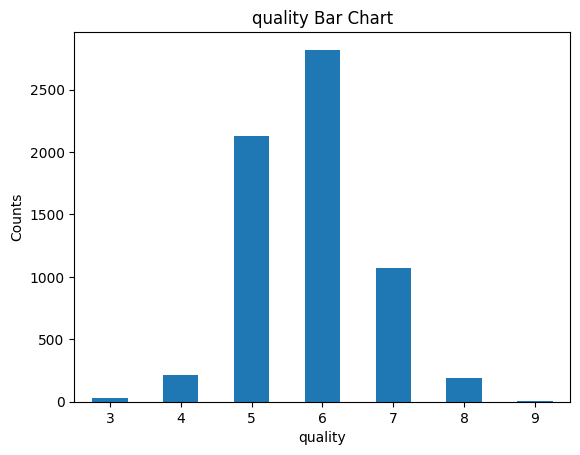

In [603]:
df_full['quality'].value_counts().sort_index().plot(kind='bar',rot=0)
plt.title('quality Bar Chart')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.show()

Από το ραβδόγραμμα είναι εμφανές ότι το quality σαν κλάση είναι unbalanced, αφού οι τιμές 5,6 και 7 έχουν πολλή μεγαλύτερη συχνότητα από τις υπόλοιπες.

## Ερώτημα 2

Για να συγκρίνουμε την ποιότητα θα πρέπει να συνδυάσουμε τα δύο είδη κρασιών στο ίδιο ραβδόγραμμα. Θα πρέπει όμως να κανονικοποιήσουμε τα δεδομένα, αλλιώς δεν θα μπορεί να προκύψει συμπέρασμα για την σχετική διαφορά που έχουν τα δύο είδη κρασιού στην ποιότητα, αφού τα λευκά υπερτερούν κατά πολύ σε αριθμό. Επειδή δεν υπάρχουν κόκκινα με ποιότητα '9', θα προκύψει error. Οπότε χρησιμοποιείται η εντολή reindex ώστε να δωθεί η τιμή '0' για την κλάση στην οποία δεν υπάρχουν κόκκινα.

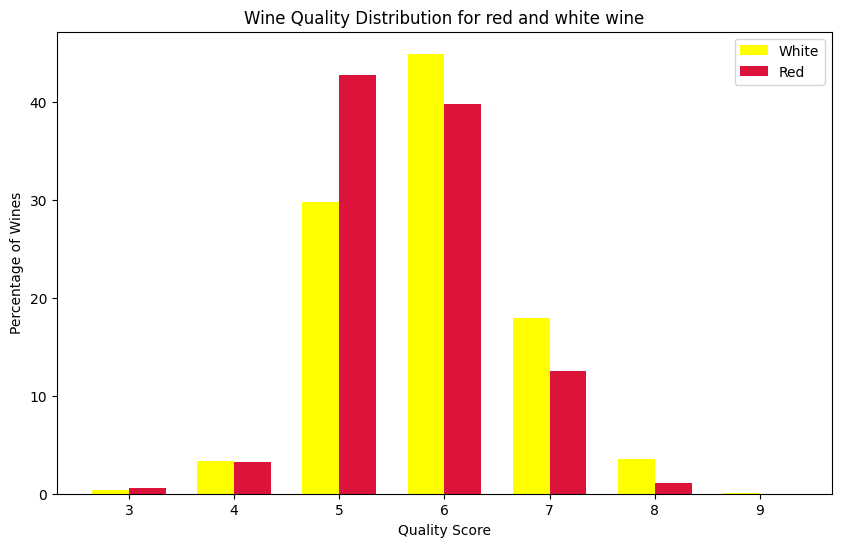

In [604]:
quality_labels = [3, 4, 5, 6, 7, 8, 9]
xi = np.arange(len(quality_labels))
width = 0.35

df_q_white = df_full[df_full['type']=='white']['quality'].value_counts().reindex(quality_labels, fill_value=0)
df_q_red   = df_full[df_full['type']=='red']['quality'].value_counts().reindex(quality_labels, fill_value=0)

white_percent = df_q_white / df_q_white.sum() * 100
red_percent   = df_q_red / df_q_red.sum() * 100

plt.figure(figsize=(10,6))
plt.bar(xi - width/2, white_percent, width, color='yellow', label='White')
plt.bar(xi + width/2, red_percent, width, color='crimson', label='Red')

plt.xticks(xi, quality_labels)
plt.xlabel('Quality Score')
plt.ylabel('Percentage of Wines')
plt.title('Wine Quality Distribution for red and white wine')
plt.legend()
plt.show()


Από το ραβδόγραμμα είναι εμφανές ότι στα δείγματα με χαμηλή ποιότητα υπερτερούν σε αριθμό τα κόκκινα, ενώ στις υψηλότερες υπερτερούν τα λευκά. Επομένως, από τα δεδομένα μπορεί να βγει το συμπέρασμα ότι το λευκό κρασί είναι ποιοτικά καλύτερο.

## Ερώτημα 3

Με τον ίδιο τρόπο μπορεί να συγκριθεί η ποιότητα μεταξύ ξηρού και γλυκού κρασιού. Σύμφωνα με τον κοινώς αποδεκτό ορισμό, ξηρό κρασί είναι το κρασί που περιέχει λιγότερα από 4 g/L αζύμωτων σακχάρων.

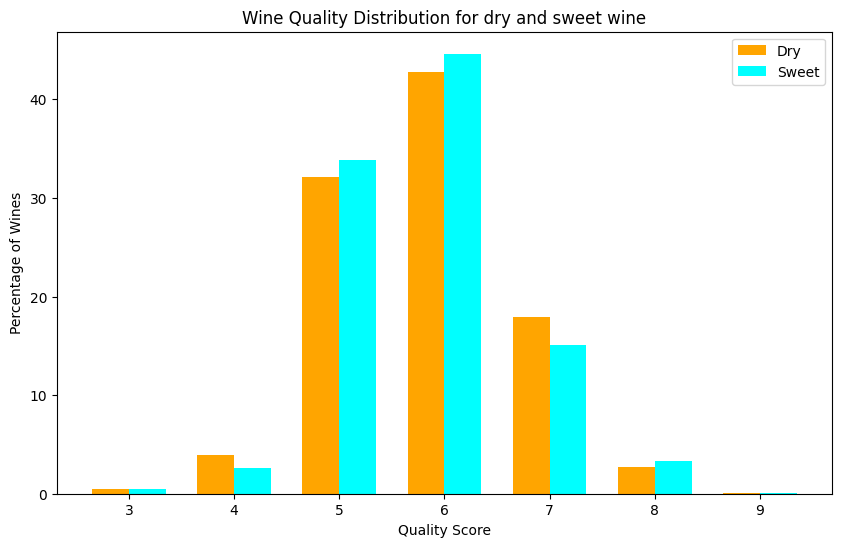

In [605]:
quality_labels = [3, 4, 5, 6, 7, 8, 9]
xi = np.arange(len(quality_labels))
width = 0.35

df_q_dry = df_full[df_full['residual sugar']<= 4]['quality'].value_counts().reindex(quality_labels, fill_value=0)
df_q_sweet   = df_full[df_full['residual sugar']>4]['quality'].value_counts().reindex(quality_labels, fill_value=0)

dry_percent = df_q_dry / df_q_dry.sum() * 100
sweet_percent   = df_q_sweet / df_q_sweet.sum() * 100

plt.figure(figsize=(10,6))
plt.bar(xi - width/2, dry_percent, width, color='orange', label='Dry')
plt.bar(xi + width/2, sweet_percent, width, color='cyan', label='Sweet')

plt.xticks(xi, quality_labels)
plt.xlabel('Quality Score')
plt.ylabel('Percentage of Wines')
plt.title('Wine Quality Distribution for dry and sweet wine')
plt.legend()
plt.show()

Με βάση το παραπάνω ραβδόγραμμα, δεν μπορεί να βγει ξεκάθαρο συμπέρασμα. Τα ποσοστά των δύο κρασιών σε κάθε κατηγορία ποιότητας είναι παρόμοια. Ακόμα, σε κάποιες υπερτερούν τα ξηρά, ενώ σε άλλες τα γλυκά.

In [606]:
mean_dry = df_full[df_full['residual sugar'] <= 4]['quality'].mean()
mean_sweet = df_full[df_full['residual sugar'] > 4]['quality'].mean()
mean_dry,mean_sweet

(np.float64(5.820845070422536), np.float64(5.815653964984552))

Τα ξηρά και τα γλυκά κρασιά φαίνεται να έχουν και σχεδόν ταυτόσημο μέσο όρο ποιότητας. Επομένως, το αν ένα κρασί είναι ξηρό ή γλυκό δεν επηρεάζει τόσο την ποιότητα.

## Ερώτημα 4

In [607]:
df_full['type'] = df_full['type'].replace('white', 0)
df_full['type'] = df_full['type'].replace('red', 1)
inputs_df_full = df_full.drop(columns=['quality'])
targets_df_full = df_full['quality']

x = inputs_df_full.to_numpy()
y = targets_df_full.to_numpy()
x.shape, y.shape

/tmp/ipython-input-1841863552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['type'] = df_full['type'].replace('white', 0)
/tmp/ipython-input-1841863552.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_full['type'] = df_full['type'].replace('red', 1)
/tmp/ipython-input-1841863552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

((6463, 12), (6463,))

In [608]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5816, 12), (5816,), (647, 12), (647,))

## Ερώτημα 5

In [609]:
tree = DecisionTreeRegressor(random_state = seed)
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [610]:
ypred_test = tree.predict(x_test)

MAE_test = mean_absolute_error(y_test, ypred_test)
print(f'The MAE of the model for the test data is: {MAE_test:.3f}')

The MAE of the model for the test data is: 0.440


## Ερώτημα 6

In [611]:
MAEs = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

    tree = DecisionTreeRegressor(random_state=0)
    tree.fit(x_train, y_train)

    ypred_test = tree.predict(x_test)
    MAEs.append(mean_absolute_error(y_test, ypred_test))

mean_MAE = np.mean(MAEs)
std_MAE  = np.std(MAEs)

print(f"Mean average of MAE: {mean_MAE:.4f}")
print(f"Standard deviation of MAE: {std_MAE:.4f}")

Mean average of MAE: 0.4628
Standard deviation of MAE: 0.0245


Ο μέσος όρος του ΜΑΕ φανερώνει ότι το μοντέλο προβλέπει την ποιότητα με ένα περιθώριο λάθους περίπου 0.5. Το σφάλμα δεν είναι αμελητέο, μιας και η κλίμακα του quality έχει τιμές από 0 έως 10. Ωστόσο, δεν υπάρχει περίπτωση το μοντέλο να θεωρήσει ότι ένα δείγμα κρασιού είναι καλής ποιότητας ενώ δεν είναι. Οπότε το ΜΑΕ μπορεί να θεωρηθεί ικανοποιητικό.

## Ερώτημα 7

In [612]:
seed = 0
val_size = 0.2

xtrain, x_val, ytrain, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

Για τους συνδυασμούς επιλέχθηκαν τα διάφορα κριτήρια που χρησιμοποιεί ο αλγόριθμος για την κατασκευή του δέντρου, το μέγιστο βάθος του δέντρου και τα μέγιστα features που μπορεί να εξετάσει το δέντρο στο κάθε split, αφού αυτές είναι οι παράμετροι που επηρεάζουν περισσότερο την απόδοση ενός δέντρου.

In [615]:
criterion_ = ['squared_error','friedman_mse', 'absolute_error']
max_depth_ = [None, 3, 5]
max_features_ = [None, 'sqrt']

variables = []

for criterion in criterion_:
  for max_depth in max_depth_:
    for max_features in max_features_:

         tree_b = DecisionTreeRegressor(criterion=criterion, max_depth= max_depth, max_features=max_features,random_state = seed)

         tree_b.fit(xtrain, ytrain)

         y_train_pred = tree_b.predict(xtrain)
         y_val_pred   = tree_b.predict(x_val)

         MAE_train = mean_absolute_error(ytrain, y_train_pred)
         MAE_val   = mean_absolute_error(y_val, y_val_pred)

         variables.append([criterion, max_depth, max_features, MAE_train, MAE_val])

cols = ['criterion', 'max_depth', 'max_features', 'MAE_train', 'MAE_val']

combinations = pd.DataFrame(variables, columns= cols)
combinations['max_depth'] = combinations['max_depth'].fillna('None')
combinations

,criterion,max_depth,max_features,MAE_train,MAE_val
0,squared_error,None,None,0.000000,0.491409
1,squared_error,None,sqrt,0.000000,0.500859
2,squared_error,3.0,None,0.585558,0.567938
3,squared_error,3.0,sqrt,0.646333,0.647798
4,squared_error,5.0,None,0.541980,0.550603
5,squared_error,5.0,sqrt,0.592263,0.589144
6,friedman_mse,None,None,0.000000,0.491409
7,friedman_mse,None,sqrt,0.000000,0.476804
8,friedman_mse,3.0,None,0.585558,0.567938
9,friedman_mse,3.0,sqrt,0.646333,0.647798


Από τον παραπάνω πίνακα βλέπουμε ότι οι καλύτεροι συνδυασμοί είναι εκείνοι που δεν έχουν όριο στο βάθος του δέντρου. Αυτό ωστόσο μπορεί να σημαίνει ότι το μοντέλο κάνει overfitting, αφού έχει μηδενικό MAE στα train data. Το δέντρο με το μικρότερο σφάλμα στα validation data είναι εκείνο που χρησιμοποιεί friedman mse ως κριτήριο διαχωρισμού, δεν έχει όριο στο βάθος του και περιορίζει τον αριθμό των features που εξετάζονται για την δημιουργία ενός κόμβου. Αυτό είναι λογικό, αφού το friedman mse είναι πιο περίπλοκη αλλά ταυτόχρονα πιο αποτελεσματική μέθοδος διαχωρισμού, ενώ ο περιορισμός των features βοηθάει στην ελάττωση του overfitting.

## Ερώτημα 8

Το πιο αξιόπιστο set για την επιλογή των υπερπαραμέτρων είναι το validation set, αφού το μοντέλο δεν έχει εκπαιδευτεί πάνω τους. Επομένως, η εικόνα που λαμβάνουμε είναι πιο αντικειμενική.

## Ερώτημα 9

Από το ερώτημα 4 έχουμε:

In [617]:
df_full['type'] = df_full['type'].replace('white', 0)
df_full['type'] = df_full['type'].replace('red', 1)
inputs_df_full = df_full.drop(columns=['quality'])
targets_df_full = df_full['quality']

x = inputs_df_full.to_numpy()
y = targets_df_full.to_numpy()

seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

/tmp/ipython-input-3396632681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['type'] = df_full['type'].replace('white', 0)
/tmp/ipython-input-3396632681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['type'] = df_full['type'].replace('red', 1)


Στην συνέχεια χρησιμοποιούμε την εντολή GridSearchCV όπως περιγράφει το documentation.

In [622]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None, 3, 5],
    'max_features': [None, 'sqrt']}


tree = DecisionTreeRegressor(random_state=0)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MAE (CV):", -grid_search.best_score_)

Best parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None}
Best MAE (CV): 0.4797079333534432


To grid search κατέληξε σχεδόν στις ίδιες υπερπαραμέτρους με το ερώτημα 7, εκτός από το max_features, για το οποίο κατέληξε ότι δεν πρέπει να έχει όριο.

## Ερώτημα 10

Υπολογισμός του MAE στο test set από το καλύτερο μοντέλο:

In [624]:
best_tree = grid_search.best_estimator_
y_grid_pred = best_tree.predict(x_test)
MAE_grid_test = mean_absolute_error(y_test, y_grid_pred)
print(f"MAE στο test set από το καλύτερο μοντέλο: {MAE_grid_test:.3f}")

MAE στο test set από το καλύτερο μοντέλο: 0.440


Περισσότερο αξιόπιστη είναι η μεθοδολογία του ερωτήματος 9. Στο ερώτημα 6 απλά εκπαιδεύαμε δέντρο αλλάζοντας κάθε φορά το seed, χωρίς όμως να εξετάζουμε τις διάφορες υπερπαραμέτρους και τις επιπτώσεις που αυτές έχουν στην ακρίβεια. Στο ερώτημα 9, εκτός από το ότι ελέγξαμε λιγότερους συνδυασμούς, χρησιμοποιήσαμε ένα σταθερό validation set. Αντίθετα, με το 10-fold cross validation του ερωτήματος 9 ουσιαστικά ελέγχουμε την αξιοπιστία του μοντέλου σε πολλά διαφορετικά τυχαία σύνολα, γεγονός που αυξάνει εκθετικά την ακεραιότητα των μετρικών του μοντέλου.

## Ερώτημα 11

Best parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None}
Best MAE (CV): 0.4797079333534432


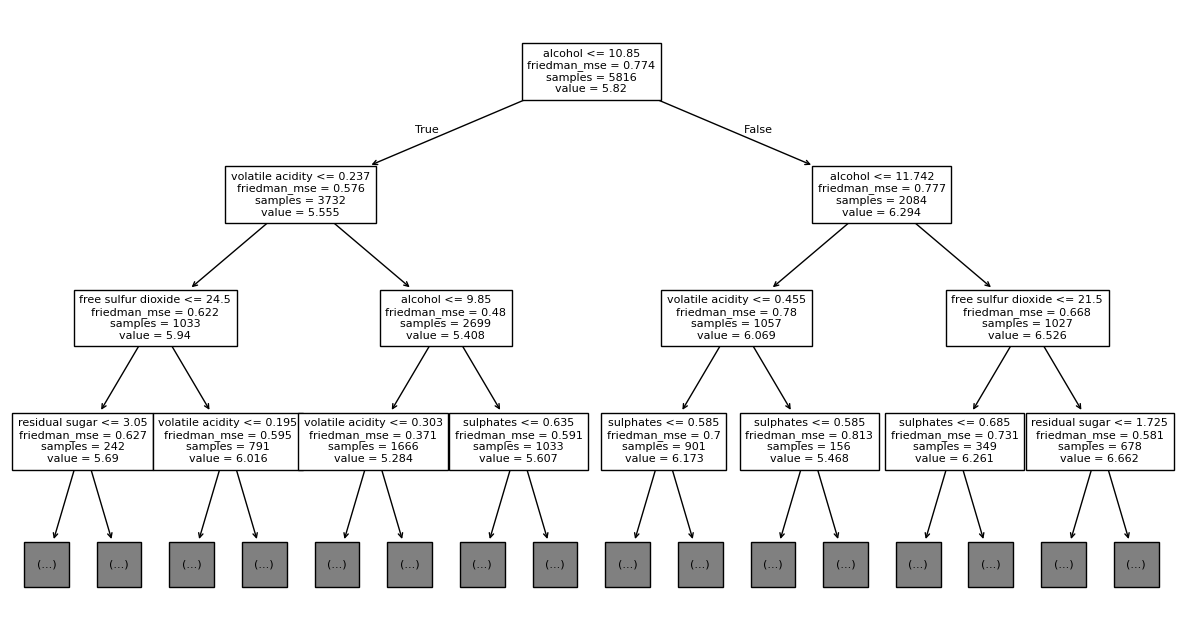

In [635]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None, 3, 5],
    'max_features': [None, 'sqrt']}


tree = DecisionTreeRegressor(max_depth = 5, random_state=0)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MAE (CV):", -grid_search.best_score_)

best_tree = grid_search.best_estimator_
plt.figure(figsize=(15,8))
plot_tree(best_tree, feature_names=inputs_df_full.columns, max_depth = 3, fontsize=8)

plt.show()

Τυπώθηκαν ενδεικτικά μόνο τα πρώτα 3 επίπεδα του δέντρου γιατί ολόκληρο είναι αδύνατον να διαβαστεί. Στον πρώτο κόμβο το δέντρο διαχωρίζει τα δείγματα με βάση το αν η συγκέντρωση σε αλκοόλ είναι μικρότερη από 10.85 v/v. Αν είναι μεγαλύτερη, ξαναδιαχωρίζει με βάση το αλκοόλ και στην συνέχεια, αν το δείγμα ξεπερνάει και το δεύτερο όριο, το διαχωρίζει με βάση το ελεύθερο διοξείδιο του θείου που περιέχει. Αν το δείγμα έχει λιγότερα από 21.5 ppm διοξειδίου του θείου, τότε διαχωρίζεται με βάση την συγκέντρωση των θειικών. Αν το δείγμα περιέχει αρκετό διοξείδιο του θείου, διαχωρίζεται με βάση το αν τα αζύμωτα σάκχαρα είναι πάνω από 1.725 g/L.

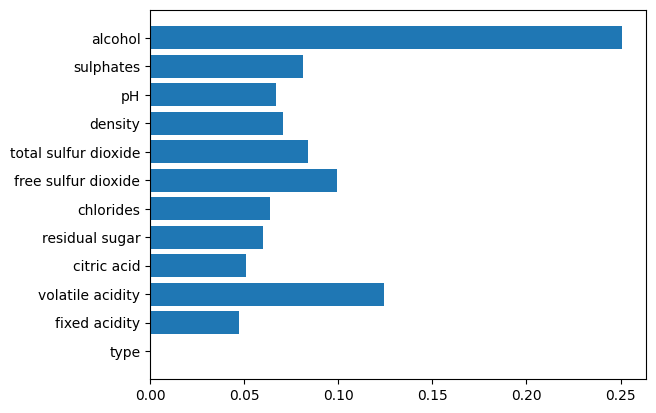

In [637]:
importances = best_tree.feature_importances_
plt.barh(inputs_df_full.columns,importances)
plt.show()

Από το ραβδόγραμμα φαίνεται ότι το σημαντικότερο feature με μεγάλη διαφορά είναι η περιεκτικότητα σε αλκοόλ. Ακολουθούν το volatile acidity και το free sulfur dioxide. Το αποτέλεσμα είναι λογικό, αφού το αλκοόλ επηρεάζει την γεύση και την "αίσθηση" του κρασιού σε μεγάλο βαθμό. Η πτητική οξύτητα, ενώ πρέπει να υπάρχει, σε υψηλές τιμές αλλοιώνει πολύ την γεύση του κρασιού. Το διοξείδιο του θείου από την άλλη συνεισφέρει σημαντικά στην συντήρηση του κρασιού.  